# 3 Exploratory Data Analysis

### 3.1 Importing Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
filename = '../Step 2 - Data Wrangling/predict-volcanic-eruptions/Data.csv'
df = pd.read_csv(filename)

df.head()

,segment_id,sensor_1_mean,sensor_1_01percentile,sensor_1_05percentile,sensor_1_10percentile,sensor_1_20percentile,sensor_1_25percentile,sensor_1_35percentile,sensor_1_45percentile,sensor_1_65percentile,...,sensor_10_var,sensor_10_max,sensor_10_min,sensor_10_range,sensor_10_kurtosis,sensor_10_skew,sensor_10_sum,sensor_10_meanAbsDev,sensor_10_localExtremaCount,time_to_eruption
0,1000015382,0.382244,-277.0,-174.0,-130.0,-83.0,-66.0,-38.0,-12.0,37.0,...,6.201152e+04,3179.0,-2961.0,6140.0,14.978788,0.058227,53806.0,163.679382,16748,16258654
1,1000554676,-3.828120,-1252.0,-878.0,-686.0,-446.0,-356.0,-206.0,-67.0,199.0,...,1.112280e+06,4442.0,-4329.0,8771.0,0.160791,0.004739,-445008.0,835.125977,5452,6347792
2,1000745424,8.291928,-1392.0,-989.0,-765.0,-497.0,-400.0,-230.0,-74.0,234.0,...,1.510302e+06,5230.0,-5040.0,10270.0,0.193508,-0.025480,-89519.0,972.496460,4705,5120693
3,1001461087,2.071582,-1017.0,-645.0,-485.0,-310.0,-246.0,-141.0,-46.0,140.0,...,5.420066e+05,5788.0,-4634.0,10422.0,2.732420,-0.051502,-82408.0,548.506348,9983,10393161
4,1001732002,0.904102,-702.0,-465.0,-358.0,-233.0,-187.0,-104.0,-33.0,105.0,...,8.239711e+05,4574.0,-3909.0,8483.0,1.135692,0.375558,1922895.0,691.087891,5633,20549733


### 3.2 Description of Data

In [3]:
df.describe()

,segment_id,sensor_1_mean,sensor_1_01percentile,sensor_1_05percentile,sensor_1_10percentile,sensor_1_20percentile,sensor_1_25percentile,sensor_1_35percentile,sensor_1_45percentile,sensor_1_65percentile,...,sensor_10_var,sensor_10_max,sensor_10_min,sensor_10_range,sensor_10_kurtosis,sensor_10_skew,sensor_10_sum,sensor_10_meanAbsDev,sensor_10_localExtremaCount,time_to_eruption
count,4.431000e+03,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,...,4.431000e+03,4431.00000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03,4431.000000,4431.000000,4.431000e+03
mean,1.074694e+09,-0.525764,-1578.586098,-1049.330399,-802.620853,-517.872038,-413.008576,-234.490860,-75.526969,233.872489,...,4.415325e+06,5228.43963,-5248.341458,10476.781088,2.611002,-0.001246,-1.970177e+04,816.007929,9427.109682,2.284891e+07
std,6.161966e+08,17.911303,3487.337427,2523.768215,2010.706912,1298.873781,1033.344497,587.431979,189.365386,585.034348,...,2.919145e+07,5172.18309,5208.346859,10342.068127,8.756652,0.123310,2.005872e+06,1467.473921,6091.334977,1.348439e+07
min,5.131810e+05,-595.469238,-32767.000000,-32767.000000,-32767.000000,-21859.000000,-17308.000000,-9715.000000,-3040.000000,0.000000,...,0.000000e+00,0.00000,-32767.000000,0.000000,-1.402664,-2.246147,-6.419482e+07,0.000000,0.000000,6.250000e+03
25%,5.527934e+08,-1.788295,-1302.500000,-883.000000,-675.000000,-435.500000,-347.000000,-197.000000,-64.000000,97.000000,...,3.380386e+05,3111.00000,-5159.000000,6257.000000,0.303863,-0.035698,-1.987590e+05,438.351517,5307.000000,1.127016e+07
50%,1.066153e+09,0.017700,-880.000000,-579.000000,-442.000000,-286.000000,-229.000000,-129.000000,-41.000000,129.000000,...,5.211669e+05,4074.00000,-4115.000000,8235.000000,0.793848,-0.000981,5.861000e+03,554.192200,6700.000000,2.246559e+07
75%,1.606350e+09,1.825470,-673.000000,-439.000000,-334.000000,-216.000000,-172.000000,-97.000000,-31.000000,197.000000,...,9.545048e+05,5161.00000,-3097.500000,10252.500000,2.360290,0.033547,2.270125e+05,753.623199,11804.500000,3.434356e+07
max,2.146939e+09,341.219940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9772.000000,...,5.496819e+08,32767.00000,0.000000,65534.000000,234.337540,1.775161,6.134024e+07,20721.322266,34815.000000,4.904609e+07


We currently have 250 features to take a look at, which makes it difficult to look at everything without creating hundreds of graphs, so I'm gonna try focusing on certain features to see if there's any relations there. The first set of features that interest me is looking to see how the local max and min counts have any affect on time to erupt.

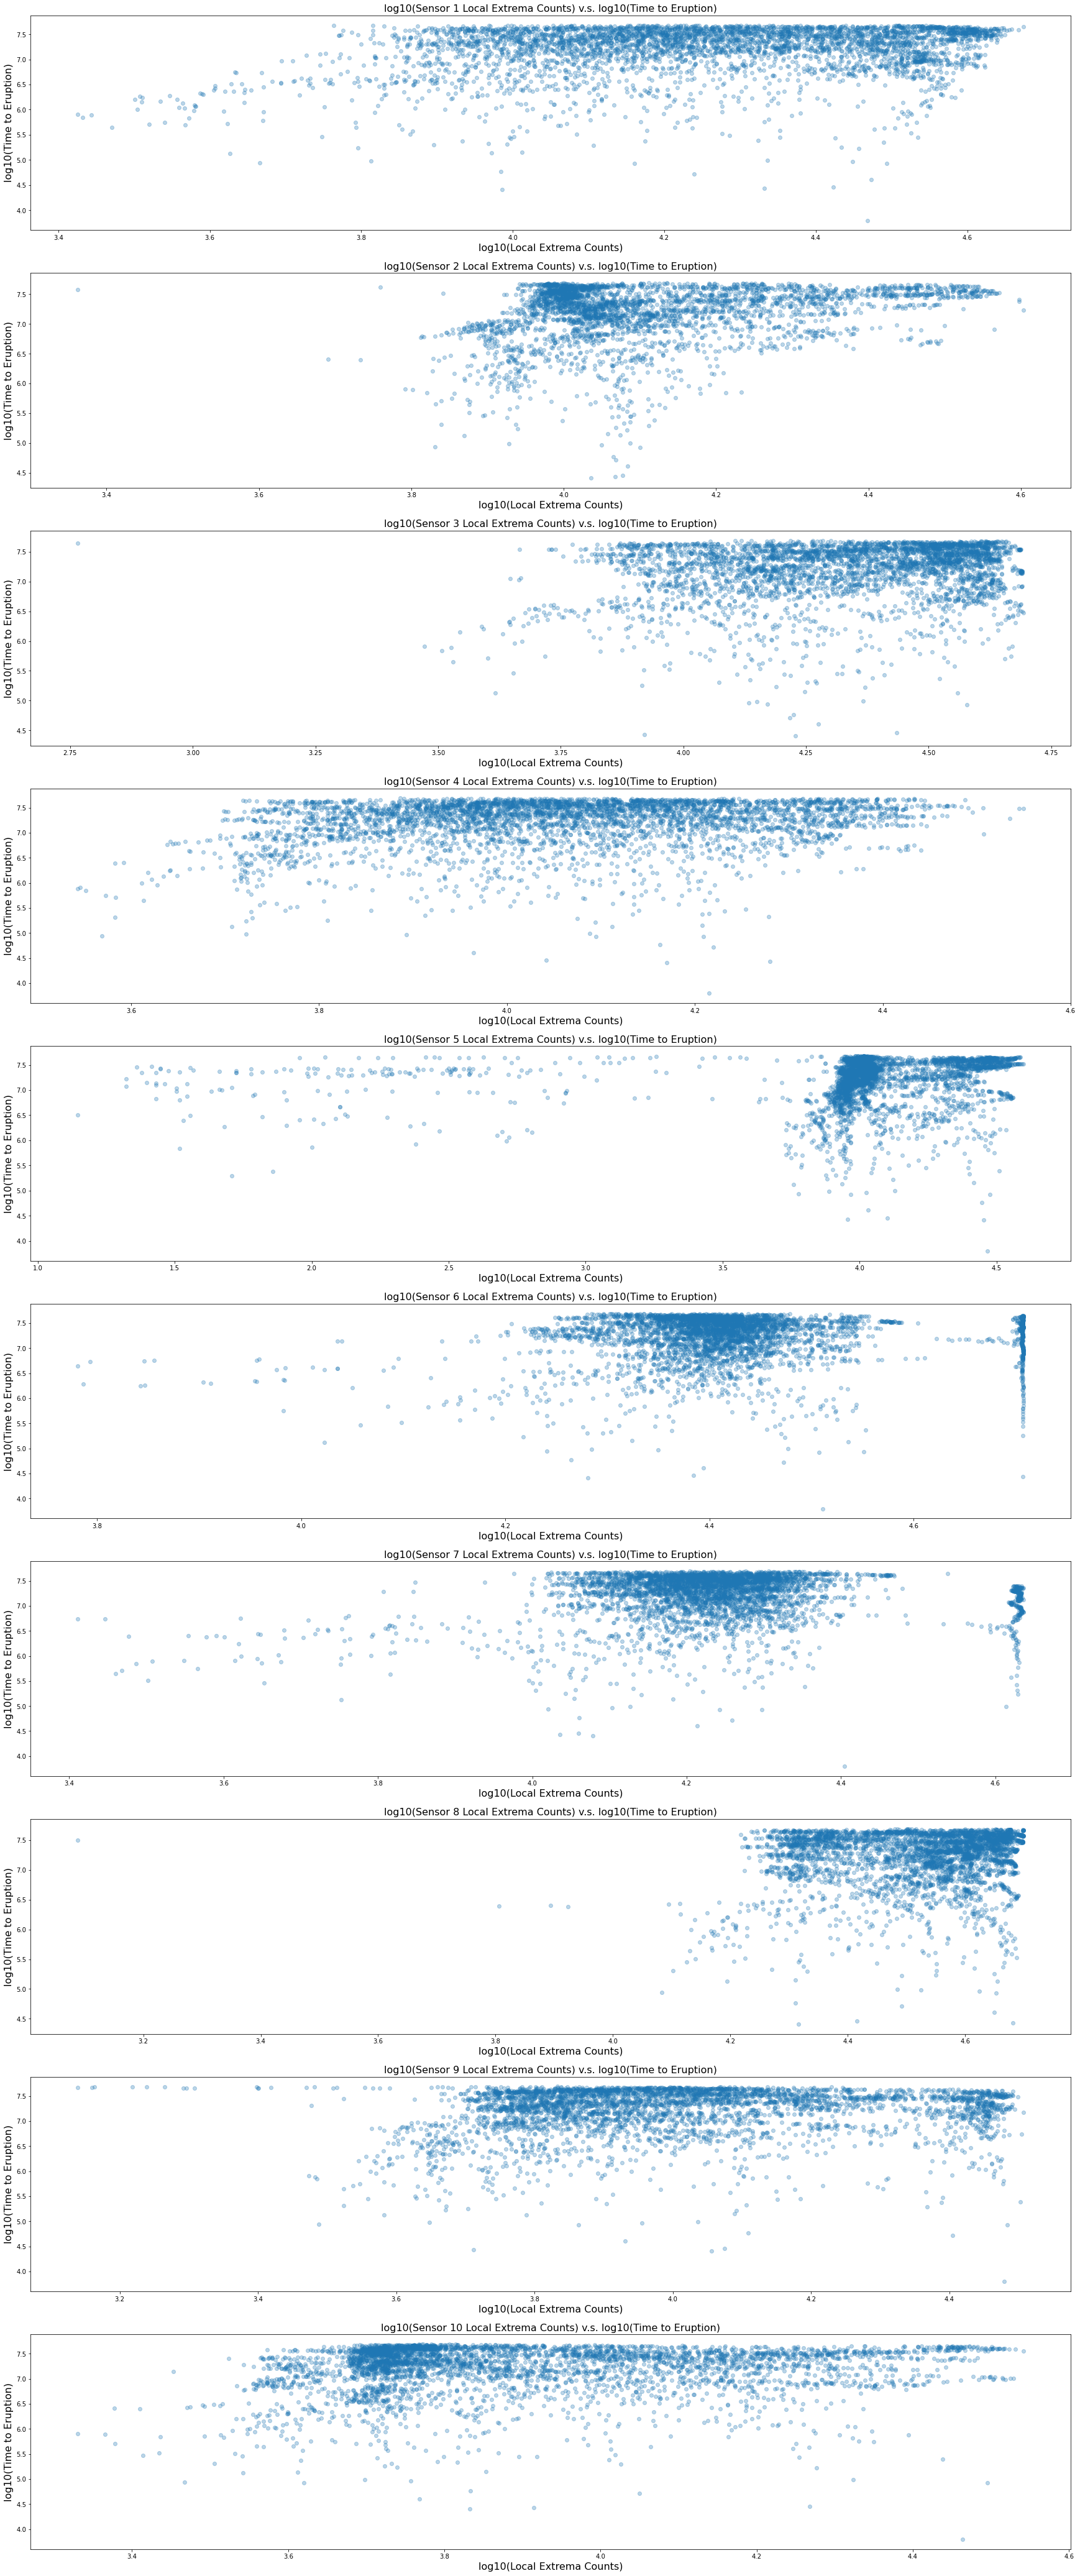

In [4]:
fig,axs = plt.subplots(10)

for i in range(10) :
    axs[i].scatter(np.log10(df[f'sensor_{i+1}_localExtremaCount']), np.log10(df['time_to_eruption']), alpha = 0.3)
    
    axs[i].set_xlabel('log10(Local Extrema Counts)', fontsize=16)
    axs[i].set_ylabel('log10(Time to Eruption)', fontsize=16)
    
    axs[i].set_title(f'log10(Sensor {i+1} Local Extrema Counts) v.s. log10(Time to Eruption)', fontsize=16)
    
fig.set_figheight(75)
fig.set_figwidth(30)

Looking at some of our sensors, we can almost see a trend in some sensors but it is pretty hard to determine just by looking at it. We see a lot of points clustered on top of each other but nothing obviously sticking out. Log base 10 was applied to our data since it scales multiple orders of magnitudes, I wanted to reduce the scale to see if a better picture can be painted. Next we will take a look at correlation to see if there is any linear relationship that might be missing in this graph.

<AxesSubplot:>

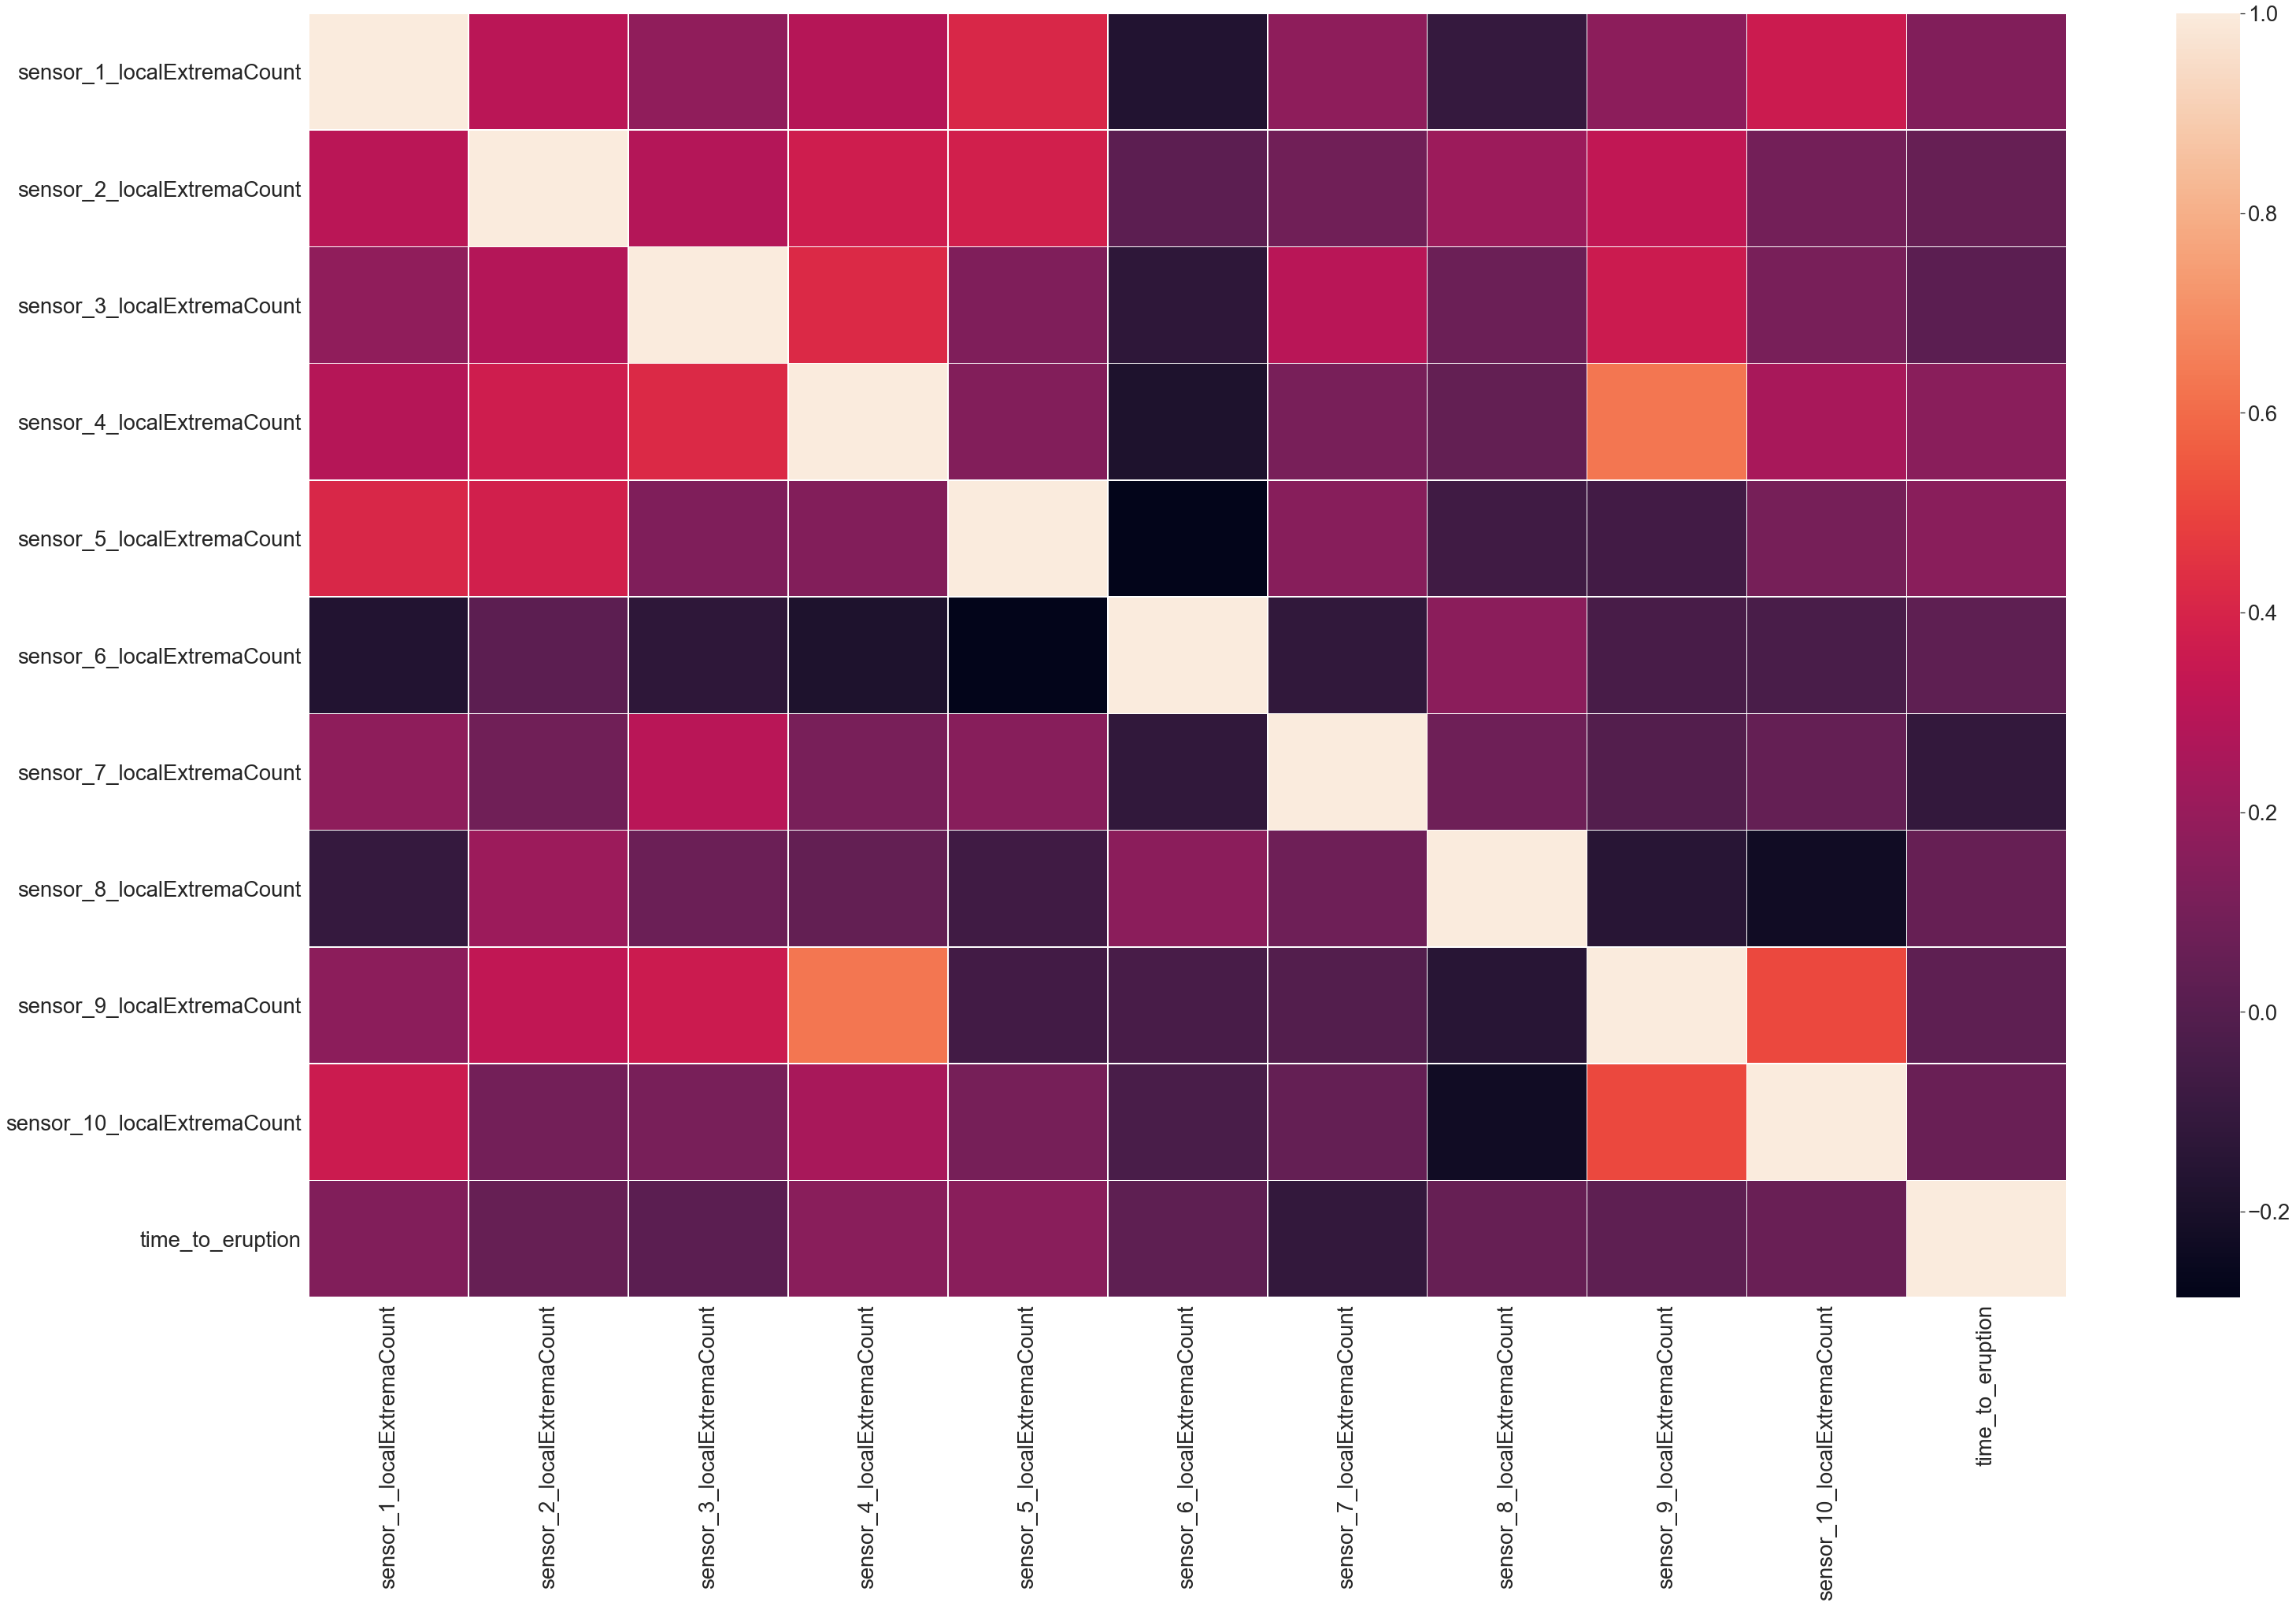

In [11]:
fig, ax = plt.subplots(figsize=(50,30)) 
sns.set(font_scale=2.5)
sns.heatmap(df[['sensor_1_localExtremaCount','sensor_2_localExtremaCount','sensor_3_localExtremaCount','sensor_4_localExtremaCount','sensor_5_localExtremaCount','sensor_6_localExtremaCount','sensor_7_localExtremaCount','sensor_8_localExtremaCount','sensor_9_localExtremaCount','sensor_10_localExtremaCount','time_to_eruption']].corr(),linewidths = 0.5,ax = ax)

Looking at the heatmap, we see some high correlations like Sensor 4 and Sensor 9 but with our target variable, nothing appears too strong. There appears to be no strong linear relationship with extrema counts and time_to_eruption.

In [42]:
scaleModel = StandardScaler()
scaleModel.fit(df)
scaledData = scaleModel.transform(df)
scaledDF = pd.DataFrame(scaledData)
scaledDF.columns = df.columns

scaledDF.head()

,segment_id,sensor_1_mean,sensor_1_01percentile,sensor_1_05percentile,sensor_1_10percentile,sensor_1_20percentile,sensor_1_25percentile,sensor_1_35percentile,sensor_1_45percentile,sensor_1_65percentile,...,sensor_10_var,sensor_10_max,sensor_10_min,sensor_10_range,sensor_10_kurtosis,sensor_10_skew,sensor_10_sum,sensor_10_meanAbsDev,sensor_10_localExtremaCount,time_to_eruption
0,-0.121207,0.050700,0.373274,0.346874,0.334557,0.334845,0.335849,0.334529,0.335511,-0.336552,...,-0.149147,-0.396287,0.439218,-0.419381,1.412547,0.482361,0.036650,-0.444575,1.201989,-0.488787
1,-0.120332,-0.184393,0.093660,0.067894,0.058006,0.055340,0.055175,0.048506,0.045034,-0.059614,...,-0.113164,-0.152069,0.176533,-0.164955,-0.279843,0.048540,-0.212055,0.013029,-0.652658,-1.223858
2,-0.120022,0.492353,0.053510,0.023908,0.018712,0.016071,0.012590,0.007646,0.008065,0.000218,...,-0.099527,0.000302,0.040006,-0.019996,-0.276106,-0.196551,-0.034810,0.106650,-0.775305,-1.314870
3,-0.118861,0.145028,0.161054,0.160227,0.157983,0.160058,0.161638,0.159170,0.155944,-0.160474,...,-0.132702,0.108199,0.117967,-0.005298,0.013867,-0.407610,-0.031265,-0.182308,0.091269,-0.923820
4,-0.118421,0.079839,0.251391,0.231557,0.221152,0.219347,0.218740,0.222163,0.224602,-0.220307,...,-0.123041,-0.126545,0.257182,-0.192805,-0.168498,3.056105,0.968564,-0.085136,-0.622940,-0.170526


Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components for state/resort summary statistics')

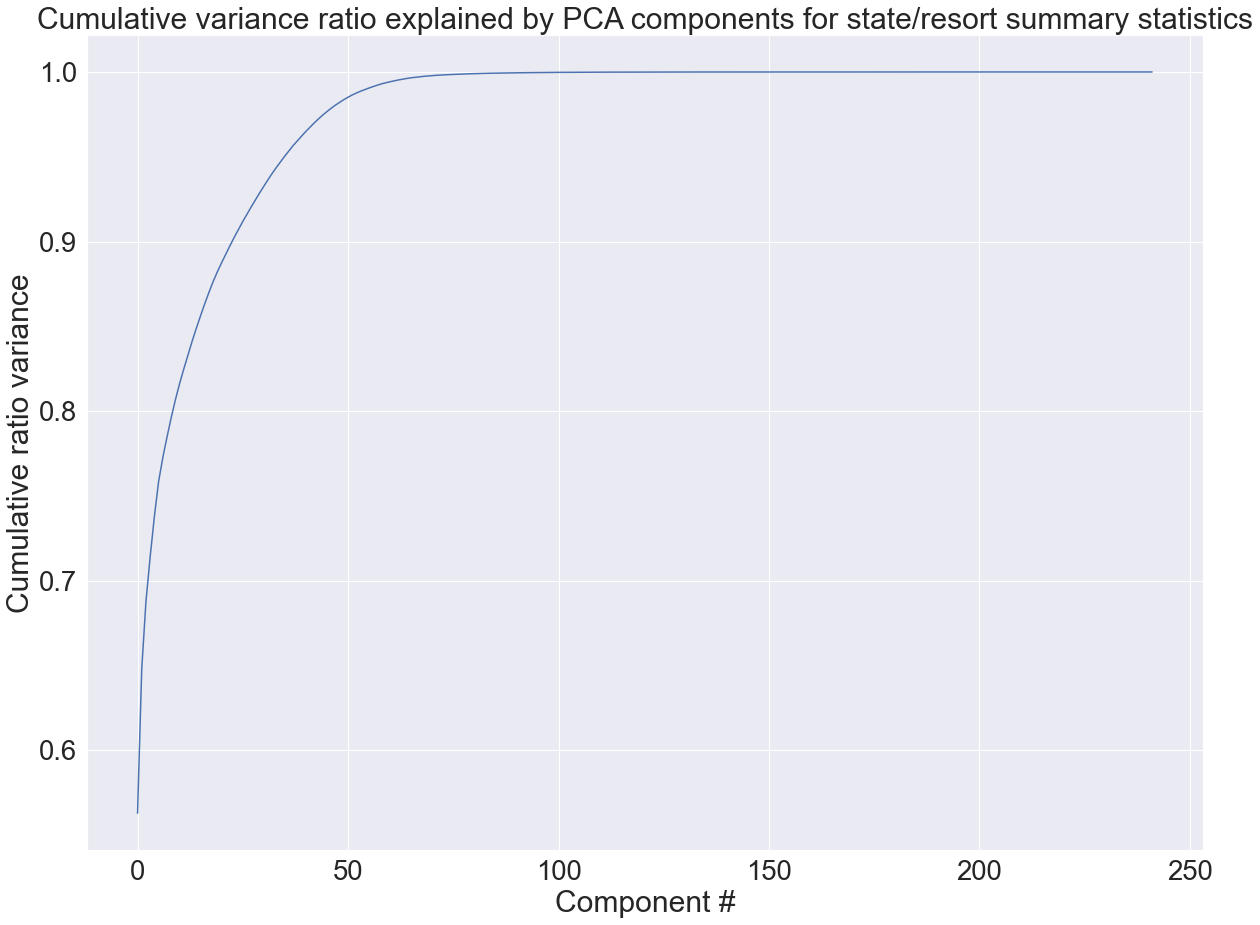

In [43]:
model = PCA()
model.fit(scaledDF)

plt.subplots(figsize=(20, 15))
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics')

In [44]:
PCAData = model.transform(scaledDF)

x = PCAData[:,0]
y = PCAData[:,1]

xDF = pd.DataFrame(x, columns = ['X'])
yDF = pd.DataFrame(y, columns= ['Y'])

PCADF = pd.concat([xDF,yDF,df['time_to_eruption']],axis=1)
PCADF.head()

,X,Y,time_to_eruption
0,-4.185138,-0.467841,16258654
1,0.472247,-0.095808,6347792
2,0.969121,-0.904861,5120693
3,-1.332452,1.313246,10393161
4,-3.092589,-0.985290,20549733


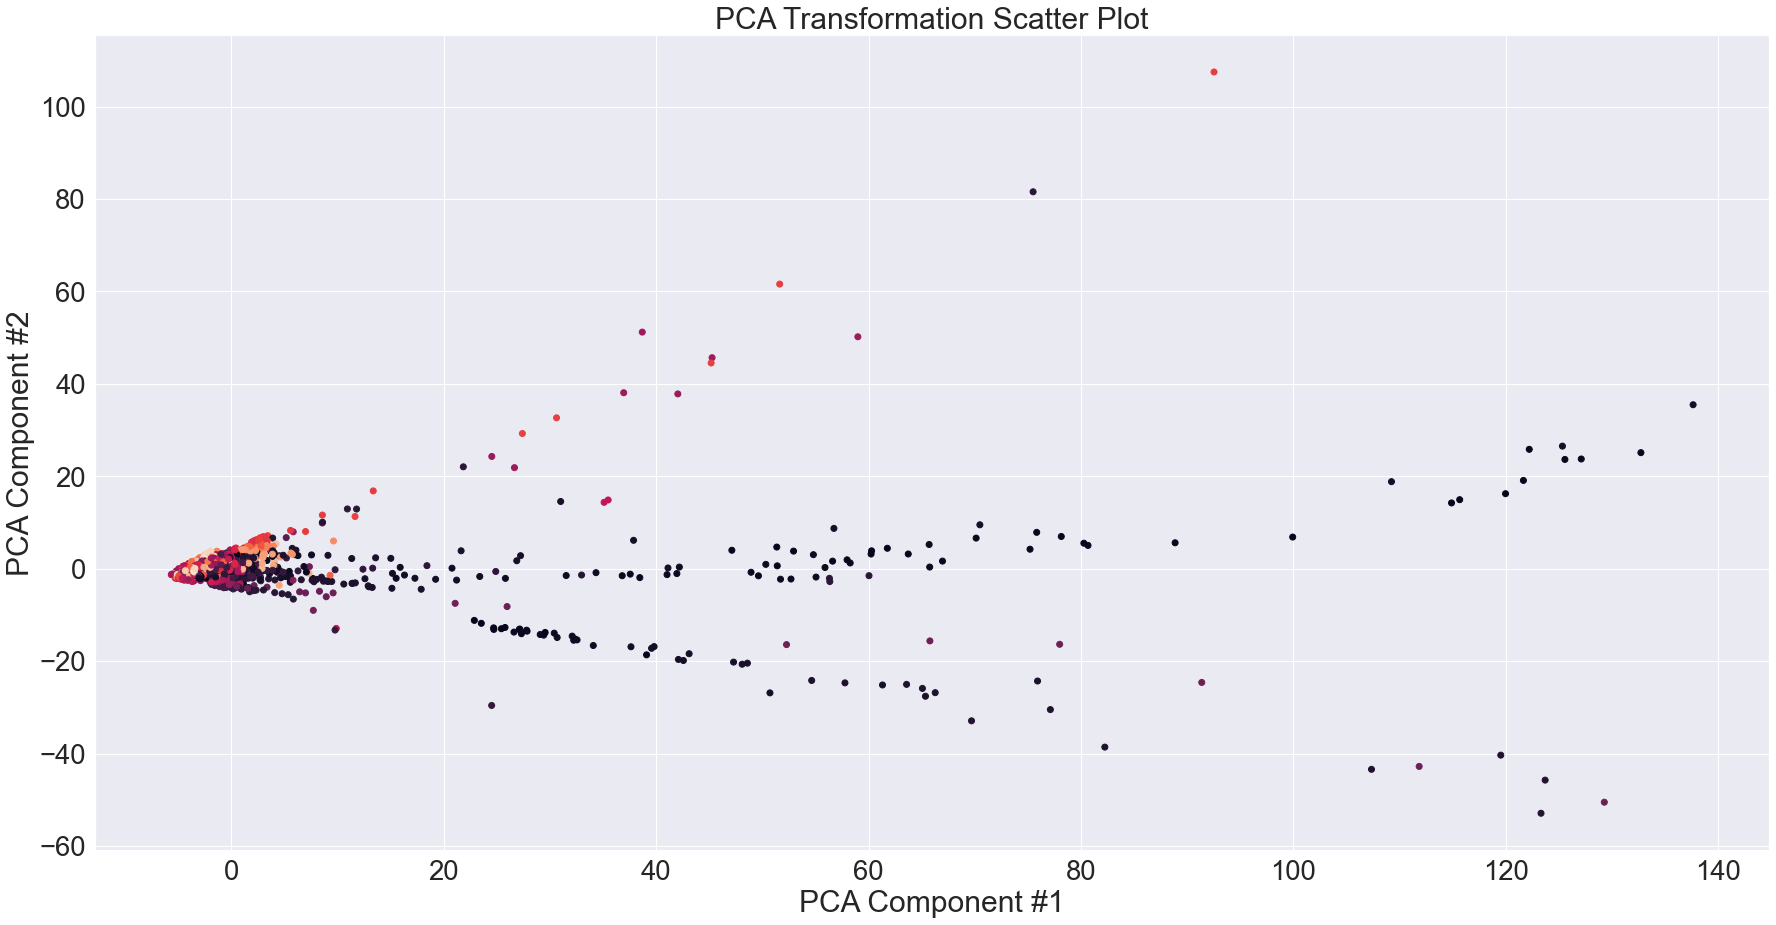

In [48]:
plt.subplots(figsize=(30,15))

plt.scatter(xDF,yDF,c = PCADF['time_to_eruption'])
plt.xlabel('PCA Component #1')
plt.ylabel('PCA Component #2')
plt.title('PCA Transformation Scatter Plot')


plt.show()